# Inverting image operations

In [18]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

# print(plt.style.available) # uncomment to print all styles
import seaborn as sns
sns.set(font_scale=2)
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (8,6.0)
%matplotlib inline

## Import an image of a Social Security Number

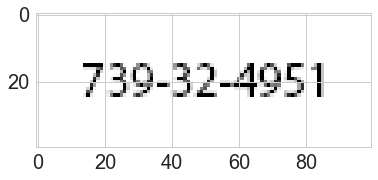

In [19]:
from PIL import Image
img = Image.open('ssn.png')
xmat = (255 - np.asarray(img).max(axis=2))/255
x = xmat.flatten()
plt.imshow(xmat);

## Construct a "blur" matrix

In [20]:
imat, jmat = np.meshgrid(np.arange(xmat.shape[0]), np.arange(xmat.shape[1]), indexing='ij')

ivec = np.atleast_2d(imat.flatten())
jvec = np.atleast_2d(jmat.flatten())

A = np.fmax(0, 1 - np.sqrt((ivec.T - ivec)**2 + (jvec.T - jvec)**2)/5)
A /= A.sum(axis=1)

## Compute y = A x

In [21]:
b = A @ x

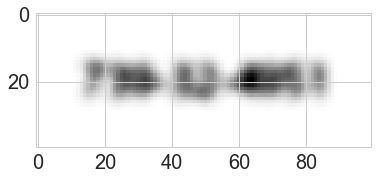

In [22]:
plt.imshow(b.reshape(xmat.shape));

## Assume we have the blurred image, solve for the unblurred one

In [23]:
import scipy.linalg as sla
P, L, U = sla.lu(A)

### What about "Solving"?

If $Ax = P L U x = b$, then there are two steps:
1. $y \leftarrow \text{solve}\,\, L y = P^Tb$
2. $x \leftarrow \text{solve}\,\, U x = y$

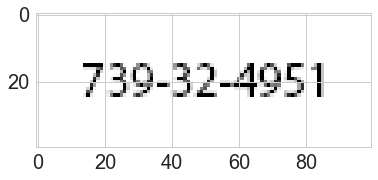

In [24]:
y = sla.solve_triangular(L, np.dot(P.T, b), lower=True)
x_solve = sla.solve_triangular(U, y)

plt.imshow(x_solve.reshape(xmat.shape))

# Now add some noise

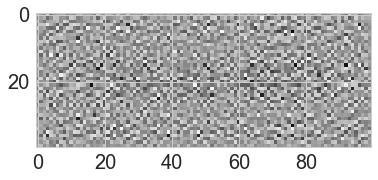

In [28]:
b_noisy = b + 1e-3 * np.random.rand(b.size)
y = sla.solve_triangular(L, np.dot(P.T, b_noisy), lower=True)
x_solve = sla.solve_triangular(U, y)

plt.imshow(x_solve.reshape(xmat.shape))